In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

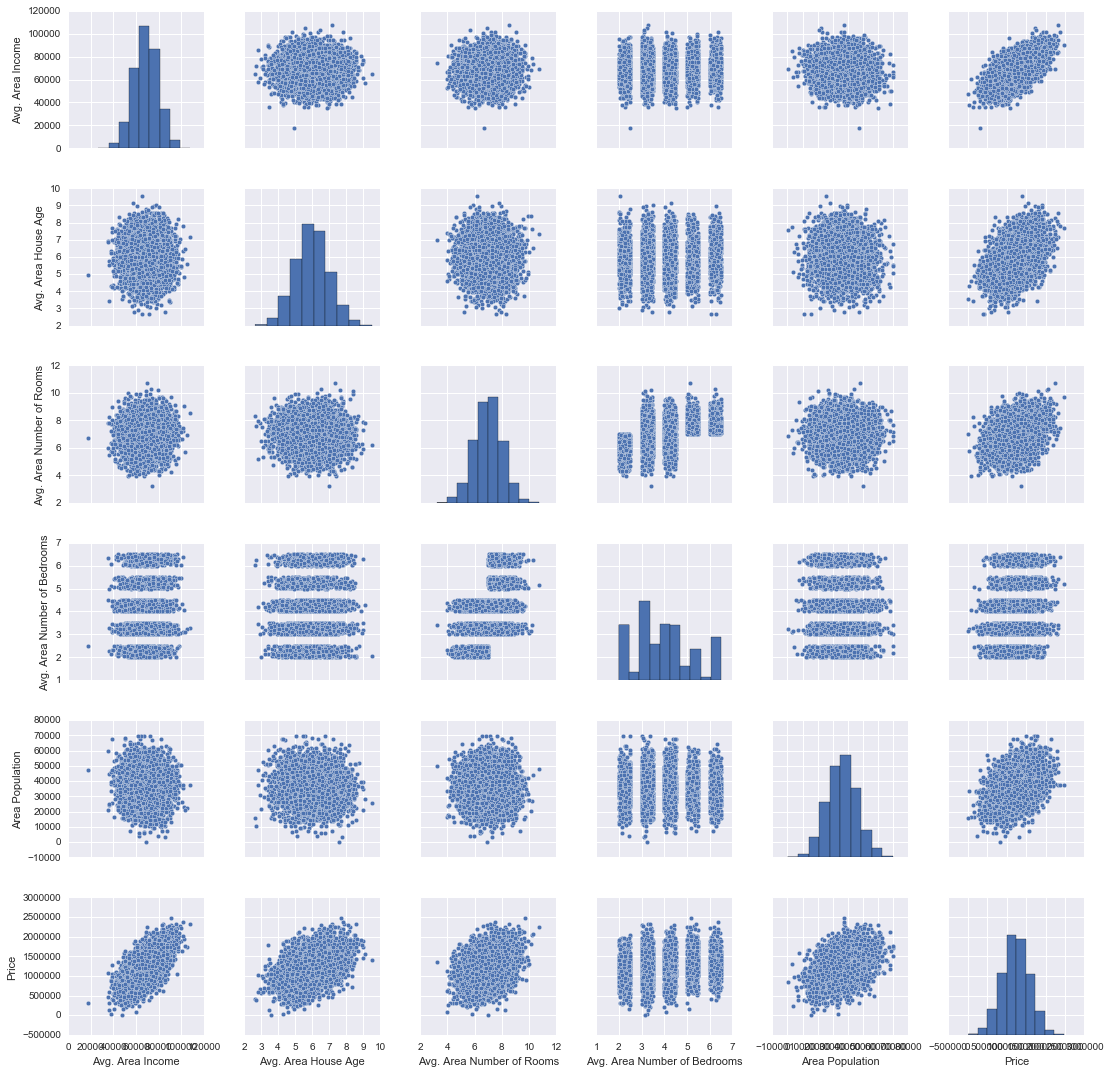

In [10]:
sns.pairplot(df)

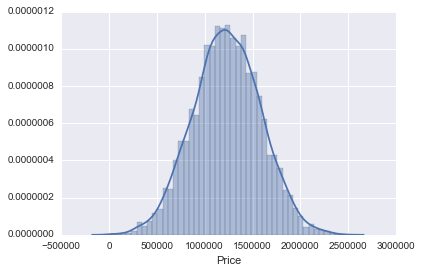

In [11]:
sns.distplot(df['Price'])

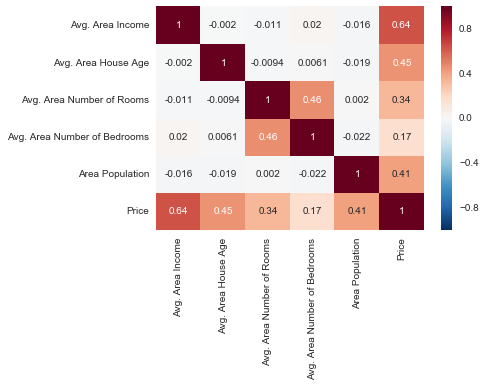

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

In [15]:
X = df[['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population']]

In [16]:
y = df['Price']

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression(n_jobs=4)

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [25]:
print(lm.intercept_)

-2640159.79685


In [26]:
lm.coef_

array([  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
         2.23380186e+03,   1.51504200e+01])

In [27]:
X_train.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population'],
      dtype='object')

In [28]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [29]:
cdf.head()

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()

In [32]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [33]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [34]:
print(boston['data'])

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


In [38]:
print(boston['target'])

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

## PREDICTIONS

In [42]:
predictions = lm.predict(X_test)

In [43]:
predictions

array([ 1260960.70567627,   827588.75560329,  1742421.24254344, ...,
         372191.40626917,  1365217.15140899,  1914519.5417888 ])

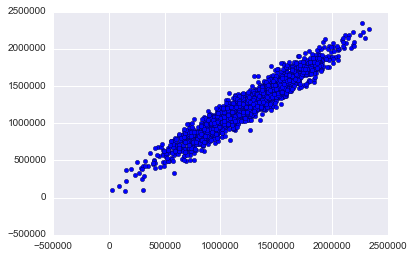

In [44]:
plt.scatter(y_test,predictions)

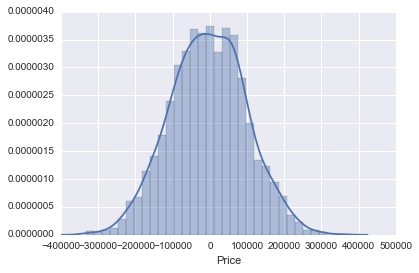

In [45]:
sns.distplot((y_test-predictions))

In [46]:
from sklearn import metrics

In [47]:
metrics.mean_absolute_error(y_test,predictions)

82288.222519149509

In [48]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208994

In [49]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290904

In [50]:
metrics.r2_score(y_test,predictions)

0.91768240096492404